# Machine learning for material science: using CrystalFeatures to predict the bandgap

*By: Sherif Abdulkader Tawfik Abbas, https://scholar.google.com/citations?user=NhT7vZIAAAAJ*, https://sheriftawfikabbas.github.io/

This tutorials covers the basics of using machine learning for material science. I will walk you through a few Python scripts that will enable you to classify materials and predict their properties.

The tutorial targets Masters/PhD students and scientists who have some experience with crystal structure (just the basics, like lattice constants and atomic positions). I also expect you to have basic experience with programming (in any language; Python, C, C++, C#, Java, JavaScript, etc).

Topics we will cover:
- Part 1: The basics of machine learning for material science: Using Python to access and process crystal structures
  - Bird's eye view on machine learning for materials
  - Google Colab
  - The MaterialsProject database
  - The PyMatGen python library
  - Structure file formats
  - Querying structures using PyMatGen
- Part 2: Doing machine learning: Predicting the band gap of materials
  - Descriptors
  - Building a simple descriptor vector for crystals
  - Building a data set
  - Machine learning

#Part 1

## Bird's eye view on machine learning for materials

### What is machine learning used for here
So what to we use machine learning for in material science? The main purpose of machine learning here is the prediction of properties of a given material. This property can either be a class (the classification problem) or a quantity (the regression problem).

### Example problems/papers

Example problems that machine learning solve:
- Is a given material metallic or semiconducting? An example paper: https://doi.org/10.1038/ncomms15679.
- What is the specific heat capacity of a material? An example paper, one of mine: https://doi.org/10.1002/adts.201900208. 


### The machine learning workflow

So how is this all done? Generally, we can think of machine learning as a 3-step process:
- Step A: First, find numerical/categoricall **descriptors** that can describe your material. That is: every material in your dataset should be uniquely represented by an array of numbers/categories.
- Step B: Then, apply your procedure to your entire dataset of structures to form a sheet of material descriptors vs. **target properties**.
- Step C: Use machine learning to predict the target properties based on the descriptors.

A schematic diagram for these steps is shown below.

![Basic machine learning workflow](https://sheriftawfikabbas.github.io/assets/images/fig_Workflow.png)

Before we go deeper into the details, we will need to learn a few things today:
- The programming language (python)
- The database of materials, from which we will get our data and create the dataset

Let's start!

## Google Colab

If you wish to learn to program in python and you don't have python installed on your computer, or you don't wish to struggle with the headache of setting it up, then you can use the Google Colab. This is a website that was developed by Google and is publicly available for anyone to use. It is pretty much an online python compiler, where you can write python code and run it, all on your web browser.

This tutorial, as you can see, is already running on Google Colab (let's just call it Colab from now on). On Colab, you can create python **notebooks**, which are known as Jupyter notebooks. Jupyter is a programming environment for python that allows the programmer to write documents, just like this one, where there is both text and code. To demonstrate the placement of code here, check out the below section. This is some python code that prints out the text `"Hello material science!"`. Press the play button, and it will run that code, and actually print out `"Hello material science!"`.

In [1]:
print("Hello material science! Happy you're here!")

Hello material science! Happy you're here!


Now, let's have a quick overview on python.

## Basic python: variables, operations, if statement, for loop

Python is quite a nice and easy language to learn and understand. In fact, it is one of the easiest languages to get you hit the road running. This is because you can virtually run your python code, or script, anywhere: on your laptop or even on your phone. This is thanks to the many online python servers that will allow you to run python code online. 

Let me give you an example of how simple it is to run python code.

### The print statement
Let's start with the simplest thing you can do in a program: to ask the computer to print out something, such as `"Like coffee?"`

How do we get the computer to print out this question on the screen? For that, we use the print statement. This statement orders the computer to print *something* to the screen. That something is called a *string*, which we will deal with shortly.

Let's write that code, which will be our first ever line of python code in this course:

In [ ]:
print("Like coffee?")

Like coffee?


Do you notice something in th above line? It looks different from normal text on this page. It is actually an *executable* line of code! This means that, when you press the play button to the left of the print statement, the program wil actually **run**! That's without needing to install any software on any computer. This is the power of using Google' Colab: it lets you execute python code on the fly.

So what just happened? We wrote a print statement, in which we called the print function. It is a function because it receives something, the "Like coffee?" text, and then performs some task with the text.

Let's try something else. Let's print two sentences:

In [ ]:
print("Like coffee?","Yes, with milk please!")

Like coffee? Yes, with milk please!


You notice what happened here? The print statement received two, not one, strings. They are separated by a comma. The print function then prints both sentences one after the other, leaving a space in between.

Now let's try to understand how do we write strings like `"Like coffee?"`

### Strings

A string is any collection of characters, numbers, dots, symbols, or anything else you can access via the keyboard (or beyond!), enclosed between two quotes, or between two double quotes. So, for example, typing `"a"` is a valid string in python:

In [ ]:
"a"

'a'

Here we just typed the string `"a"`, and python only repeated the value of that string, which again is `'a'`. Did you spot the difference?

A string in python is composed of three things: an opening quotation mark, a set of characters, and a closing quotation mark. Python accepts two types of quotation marks: single, and double. So we can also type `'a'` up there, and we will get the same result.

The string is an example of a python data type: it is something that represents a value.

### Python data types: strings, numbers and boolean values

Python has a number of data types that enable you to perform various types of operations on data. Here we discuss the fundamental three data types of python: strings, which we just discussed above, numbers and logical, or boolean values.

Numbers are just numbers! Type a number in the python interpreter, say `5`, and you will just get `5` back.

### Variables

A variable in python, as well as in programming language, enables you to store a value in memory. Let us create a variable that will store the string value "I love coffee" in memory.


In [ ]:
s = "I love coffee"
print(s)

I love coffee





### Arithmetic operations: `+`, `-`, `*`, `/`, `%`, `//`

Back to operators. You can work with the standard maths operators in python, which are `+`, `-`, `*`, `/` and `%`. The first four are obvious, but `%` might need an introduction. The `//` operator is related to the `/`: it lets you get the quotient of the division, and therefore it is called the floor operator `//`. That is, it just removes the decimal part of the division result. For example, `9//4=2`.

`%` is the modulus operator. It is related to the `//` operator in that: while `a//b`  gives you the integer *quotient*, `%` gives the *remainder*. For example, in the division `9/4=2+1/4`, the quotient is `2` and the remainder is `1`. Then in python, `9%4=1`.

### Comparison operations: `==`, `!=`, `<`, `>`, `<=`, `>=`

Now that we know how to use operators on numbers to create numbers, the above operators create boolean values. This is because they ask questions about the variables they operate on.

- `a == b` means: is `a` exactly equal to `b`?
- `a != b` means: is `a` **not** equal to `b`?
- `a < b` means: is `a` less than `b`?
- `a > b` means: is `a` greater than `b`?
- `a <= b` means: is `a` less than **or equal to** `b`?
- `a >= b` means: is `a` greater than **or equal to** `b`?

Let's evaluate an expression baesd on these operators:


In [ ]:
#This code demonstrates operations
a = 3
b = 5
c = a == b
print(c)
d = a > b
print(d)
e = a <= b
print(e)

False
False
True



### Lists
A `list` in python is exactly what its name suggests, a list of things. Like a list of numbers, names, or even a mix of both. To create a list, we have to follow a simple syntax rule: enclose the things in the list between two *square brackets*, like those `[` and `]`, and separate between the list elements using commas, `,`. So for example, here is a list of numbers: `a = [4,6,7,1,0]`, a list of strings: `a = ["a","?","neptune is a planet"]`, a list of both: `a = [3,0,"Where is my car?"]`.

Well, you can also create a list of lists in python! And you can *nest* as many lists as you want. Here is an example: `a = [[1,2],[3,4],[5,6]]`. This is a list of three elements, each element being itself a list of two elements.

#### Accessing and changing list elements

To access a list element, we apply this syntax rule: find out what the *order* of that element is, and then access it using the square brackets. The order of an element in a list is an integer. The order of the first element is always `0`. Here is an example.



In [ ]:
a = ["I","want","to","order","the",4,"dollars","mocha"]
print(a[0])

I


The string `'I'` is the first element of list `a`, and therefore its index is `0` and can be retrieved by typing `a[0]`.

We can change the element in a list by just assigning it a new value.



In [ ]:
a = ["I","want","to","order","the",4,"dollars","mocha"]
a[5] = "yes you can!"
print(a)

['I', 'want', 'to', 'order', 'the', 'yes you can!', 'dollars', 'mocha']




#### Checking if a value exists in a list

To find if some value belongs to a given list, we use the `in` keyword in python. For example, given the list `a = [1,2,3]`, the boolean expression `2 in a` will return `True` because that's a correct statement.

#### Adding elements to a list

There are two ways to add elements to a list:
- By using the `+` operator e.g. `[1,2,3]+[4]` gives `[1,2,3,4]`.
- By using the `append()` function e.g. `a = [1,2,3];a.append(4);print(a)` gives `[1,2,3,4]`.
- By using the `inset()` function if you want to add an item at a specified index e.g. `a = [1,2,3];a.insert(1,4);print(a)` gives `[1, 4, 2, 3]`.

#### Adding a list to a list

Let's say you have two lists `a=[1,2]` and `b=[3,4]`, and you wish to create the list `[[1,2],[3,4]]`. Let's try to use `+` and `append()` and see if they will give us what we are after.

### Tuples

A tuple, like a list, is a collection of things, but the things are enclosed between `(` and `)`. But there is even a more important difference: once you group things in a tuple, you cannot change them. That is, a tuple is *immutable*.

For example, let's create a tuple and attempt to change the value of one of the elements.



In [ ]:
a = (3,4,5)
#a[0] = 2
#The above line gives an error!

### Dictionaries

We learned in lists and tuples that the elements are indexed. The index is an integer that starts from `0`. A dictionary extends the indexing concept: a dictionary is a collection of indexed objects, where the indices themselves can be anything *immutable*: numbers, float, strings and tuples (and frozensets, but we won't discuss that one today).

The syntax for creating a dictionary is as follows: `{key:value}`, where `key` is the index, `value` is any data type. For example,

In [ ]:
a = {'apple':3.5, 'pear': 2.5, 'banana':4}
print(a['apple'])
b = {'a':"lists",'b':"tuples",'c':"sets",'d':"dictionaries"}
print(b['c'])

3.5
sets


### The conditional statement

So far, we have been dealing with simple python statements. Each statement could be written in a single line of code, and they instructed the computer to perform a single task. For example, `a = 4` instructs the computer to put `4` into `a` and that's it.

Serious programming starts when we let the computer make decisions after it tests certain conditions. Instead of just printing a name, how about we get the computer to print the name only **if** it starts with letter `A`?

I just said **if**, which means: some condition should be tested before the print statement is executed. Now let me introduce the `if` statement in python. This statement has the following syntax:

```
if boolean_expression:
  some_statements
```

The `boolean_expression` evaluates to either True or False. The `if` statement will only execute the statements if `boolean_expression` evaluates to `True`. Otherwise, these statements will not be executed.

So, to solve the above problem, here is the code:


In [ ]:
s = 'Ahmed'
if s[0] == 'A':
  print(s)

Ahmed


#### The `elif` clause

Sometimes the condition we are testing might evaluate to more than two possible outcomes. For a simple demonstration: I will decide to put on a jacket if it's very cold outside. But if it's fair, maybe just a jumper. Otherwise, a t-shirt. So here we have three possible outcomes for the condition testing. The testing will check the temperature, and decide accordingly.

In [ ]:
temperature = 15
if temperature < 15:
  print('I am wearing a jacket')
elif temperature < 20:
  print('I am wearing a jumper')
else:
  print('I am wearing a t-shirt')

I am wearing a jumper


### The loop statements

Python has two loop statements: the `for` and the `while` loop statements. The loop is a very important programming construct. It enables you to repetitively run a block of statements as long as a given condition is correct. Loops let us start write complex code that can solve complex problems; it is actually the starting point for doing serious programming!

#### The `for` loop

The syntax of the `for` loop is:

```
for x in collection:
    statement1
    statement2
    ...
    statementN
```

Here `collection` could be any of the four collection types in python that we covered in Class 3. Note the `in` operator here.

In the `for` statement, `x` is called the *index* of the loop.

For example, the following loop will print out the elements from a list:


In [ ]:
for k in [1,2,3]:
  print(k)

1
2
3



#### The `while` loop

The syntax of the `while` loop is:

```
while x:
    statement1
    statement2
    ...
    statementN
```

The `while` loop keeps running the statement block as long as `x` is true. So `x` here is a boolean expression. For example:


In [ ]:
a = 10
while a > 0:
  print(a)
  a-=1

10
9
8
7
6
5
4
3
2
1


### Python libraries

One of the most powerful features of python is its libraries. A library is a python script that was written by someone, and that can perform a set of tasks. You can make use of a python library by just using the `import` command. For example, when you want to calculate the logarithm, the `log()` function you would look for exists in the `numpy` library.


In [1]:
import numpy as np
print(np.log(11))

2.3978952727983707



## The MaterialsProject database

The MaterialsProject (MP) database is a massive amount of material science data that was generated using density functional theory (DFT). Have a look at the database here: https://materialsproject.org. Check the statistics at the bottom of the page. There are 124,000 inorganic crystals in the database, along with the DFT-calculated properties of these materials. There are also 530,000 nanoporous materials, as well as other stuff. It's a huge amount of material data.

### Signing up and the API key

You will need to **sign up** in materialsproject.org to be able to access the database. Signing up there is free.

Once you sign up, you can obtain an **API key** that will enable you to access the database using python. Will discuss this further shortly.

### A look at MaterialsProject

Let's have a look at the 124,000 inorganic crystals data. Each one of these crystals is a 3D crystal that includes: a number of elements, arranged in a lattice structure. Check, for example, the MP page for diamond: https://materialsproject.org/materials/mp-66/.

![MP page for diamond](https://sheriftawfikabbas.github.io/assets/images/MP_diamond.png)

Note that each material on MP is identified by an ID that goes like `mp-X` where `X` is a number. The ID of diamond is `mp-66`. People use these identifiers when referring to MP materials in papers, and we will use them soon when we start querying materials from MP using python.

There you will find the crystal structure, the lattice parameters, the basic properties (in a column to the right of the figure that displays the crystal), and then a range of DFT-calculated properties.

### The DFT properties

These are quantities that are calculated for each crystal in MP. In fact, every thing you see on the MP page for diamond was calculated using DFT. 

- For a given elemental composition, the lattice parameters and the positions of the atoms within the lattice are all obtained using DFT.
- For the obtained crystal structure, the `Final Magnetic Moment`, `Formation Energy / Atom`, `Energy Above Hull / Atom`, `Band Gap` are calculated. The `Density` is derived from the obtained crystal structure.
- Further DFT calculations are performed to obtain the band structure as well as other properties that you can find as you scroll down the structure page on MP.

Some of the crystals on MP correspond to crystals that exist in nature, and some are purely hypothetical. The hypothetical crystals have been generated by some algorithm that uses artificial intelligence, or probably by simple elemental substitution.

### Why is MP great for machine learning?

Because of the huge amount of materials (dataset) and DFT-calculated properties (target properties). That much data can be utilised using a range of machine learning methods to make predictions with various levels of accuracy.

## The PyMatGen python library

To be able to query the MP database, the MP team provided the community with a python library that you can install on your computer (or in Colab as I will show you).

Remember: to be able to run the codes in this section, you must obtain an API key from the MP website: https://materialsproject.org/docs/api#API_keys.

The first thing we do here is to install PyMatGen in Colab.


In [2]:
!pip3 install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 23.3 MB/s eta 0:00:00


This will download PyMatGen into your Golab environment. Now, we are going to use PyMatGen to do two things: open a CIF crystal file to view its content, and query MP for crystals that satisfy certain properties.

By the way, I used the `pip3` command to install PyMatGen. On your computer, if you have python installed, you can install PyMatGen by typing the same command with the `!`:

```
pip3 install pymatgen
```

## Structure file formats

One of the most common file formats that describe crystal structure is the CIF format (Crystallographic Information File). The official definition of this formnat is here: https://www.iucr.org/resources/cif.


But we are not going to learn the details of the format. We will just learn how to open a CIF with pythton. Here is how we can do this.


In [3]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen

request = urlopen("https://raw.githubusercontent.com/sheriftawfikabbas/crystalfeatures/master/Li10Ge(PS6)2_mp-696128_computed.cif")
cifFile = request.read().decode('utf-8')
parser = CifParser.from_string(cifFile)

In the above code, we imported a **class** from the PyMatGen library: the `CifParser` class. It allows us to create a new CIF file **object**. This object will then represent the CIF structure, and can be used to access its information.

Next, let's extract some information from the `CifParser` object.


In [4]:

structure = parser.get_structures()
# Returns a list of Structure objects
# #http://pymatgen.org/_modules/pymatgen/core/structure.html
# Let's print the first (and only) Structure object
print(structure[0])


Full Formula (Li20 Ge2 P4 S24)
Reduced Formula: Li10Ge(PS6)2
abc   :   8.787646   8.787646  12.657546
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (50)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0.228698  0.27295   0.294563
  1  Li    0.771302  0.72705   0.294563
  2  Li    0.27295   0.771302  0.794563
  3  Li    0.72705   0.228698  0.794563
  4  Li    0.228698  0.72705   0.294563
  5  Li    0.771302  0.27295   0.294563
  6  Li    0.27295   0.228698  0.794563
  7  Li    0.72705   0.771302  0.794563
  8  Li    0         0         0.93973
  9  Li    0         0         0.43973
 10  Li    0.5       0.5       0.54802
 11  Li    0.5       0.5       0.04802
 12  Li    0.256318  0.724772  0.036663
 13  Li    0.743682  0.275228  0.036663
 14  Li    0.275228  0.256318  0.536663
 15  Li    0.724772  0.743682  0.536663
 16  Li    0.275228  0.743682  0.536663
 17  Li    0.724772  0.256318  0.536663
 18  Li  

Here we have the details of the CIF structure in a human-readable format, which include the formula, the lattice parameters and the positions of the atoms in the crystal.


In [ ]:

structure = structure[0]

print(structure.lattice)
print(structure.species)
print(structure.charge)
print(structure.cart_coords)
print(structure.atomic_numbers)
print(structure.distance_matrix)

8.787600 0.000000 0.000000
0.000000 8.787600 0.000000
0.000000 0.000000 12.657500
[Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Ge, Element Ge, Element P, Element P, Element P, Element P, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S]
0
[[2.00972412e+00 2.39901480e+00 3.72889950e+00]
 [6.77787588e+00 6.38858520e+00 3.72889950e+00]
 [2.39901480e+00 6.77787588e+00 1.00576495e+01]
 [6.38858520e+00 2.00972412e+00 1.00576495e+01]
 [2.00972412e+00 6.38858520e+00 3.72889950e+00]
 [6.77787588e+00 2.39901480e+00 3.72889950e+00]
 [2.39901480e+00 2.00972412e+00 1.00576495e+01]
 [6.388

## Querying structures using PyMatGen

Now let's use PyMatGen to query structures from MP. To be able to do that, we need first to create a `MPRester` with the API key that we receive from MP.

In [5]:
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError

m = MPRester("Ua7LfrKkn9yTWA3t")

/usr/local/lib/python3.10/dist-packages/pymatgen/ext/matproj.py:183: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


**Note: I am hiding my API key here. I am not allowed to share it, sorry!**

Then we can use the object variable, `m`, to access MP. For today, I willl just show you a simplle query: getting MP IDs for all materials with bandgap larger than 1:

In [6]:
results=m.query({"band_gap": {"$gt": 6}},properties=["material_id"])

100%|██████████| 845/845 [00:00<00:00, 1725.78it/s]


You can notice that this operation takes time: there are 918 such materials.

Finally, let's have a look at the MP IDs we got. This code shows the total count, and the first 10 MP IDs.

In [7]:
print(len(results))
results[0:10]

845


[{'material_id': 'mp-1001080'},
 {'material_id': 'mp-1004528'},
 {'material_id': 'mp-1017626'},
 {'material_id': 'mp-1019509'},
 {'material_id': 'mp-1019539'},
 {'material_id': 'mp-1019741'},
 {'material_id': 'mp-1019742'},
 {'material_id': 'mp-1019804'},
 {'material_id': 'mp-1020018'},
 {'material_id': 'mp-1020022'}]


One last thing: let's query a crystal from MP using its MP ID.



In [8]:
results=m.query({"material_id": 'mp-1207450'},properties=["cif"])
cifFile = results[0]['cif']
parser = CifParser.from_string(cifFile)

structure = parser.get_structures()
print(structure[0])

Full Formula (Zn18 Fe8)
Reduced Formula: Zn9Fe4
abc   :   7.773250   7.773250   7.773250
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (26)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Zn    0.356237  0         0.751283
  1  Zn    0.751283  0         0.356237
  2  Zn    0.248717  0.604954  0.248717
  3  Zn    0.604954  0.248717  0.248717
  4  Zn    0.643763  0.395046  0.643763
  5  Zn    0.395046  0.643763  0.643763
  6  Zn    1         0.751283  0.356237
  7  Zn    1         0.356237  0.751283
  8  Zn    0.356237  0.751283  0
  9  Zn    0.643763  0.643763  0.395046
 10  Zn    0.248717  0.248717  0.604954
 11  Zn    0.751283  0.356237  0
 12  Zn    0         0.643607  0.643607
 13  Zn    0         0.356393  0.356393
 14  Zn    0.356393  0.356393  0
 15  Zn    0.643607  0.643607  0
 16  Zn    0.356393  0         0.356393
 17  Zn    0.643607  0         0.643607
 18  Fe    0.206521  0         0
 19  Fe    0 

#Part 2

## Descriptors

Before we start ML, let’s address a very important question that lies at the centre of the field of ML-driven material discovery: **how do we apply ML to predict crystal properties?**

First, **what are crystal properties?** These are quantities that are measured or calculated for crystals. By crystal, I mean a structure that is endowed with **periodicity**. Let’s take the example of **diamond**. This material has just one atom, carbon (C). If you could zoom-in very close into diamond such that you can see the C atoms (people sort of do that using advanced experimental techniques by the way), you will see something similar to the following figure.

![Left: the diamond unit cell. Right: infinitely repeating the unit cell in the three directions gives us the diamond crystal.](https://sheriftawfikabbas.github.io/assets/images/diamond.png)

The figure illustrates how a diamond crystal is created from the **diamond unit cell**, which is the little molecule on the left with 4 C atoms. The crystal has **infinitely many diamond unit cells* along the three directions, so it is a 3D pattern.

Before we discuss crystals further, consider molecules for a minute. Molecules are **fundamentally different** from crystals because of the pattern (periodicity) bit: a molecule is just that one single molecule, sitting on its own, in isolation, whereas a crystal is really composed of an infinite number of molecules. How would the pattern in the crystal make ML for molecules different from ML for crystals?

To predict the properties of the molecules one can derive a set of descriptors for the molecules in the data set that are based on the **positions of the atoms within the molecule**. One can derive descriptors based on the relative positions, in order to ensure that the descriptors are **invariant to transformations**: rotation and translation.

The key thing here in the molecular descriptors is that they are **based on the atomic positions**. In crystals, **we can't really use atomic positions** like we did with molecules to obtain descriptors. Why?

Think about the diamond crystal pattern above. Because it is a pattern, it is **symmetric in all three directions**. Now let's say we are going to calculate the Coulomb matrix for diamond, so we start with the positions of the atoms in the unit cell of diamond, that figure on the left. But wait: even though these four atoms do form a valid unit cell for diamond, we can also come up with another valid unit cell, as shown below.

![Another possible structure for the diamond unit cell.](https://sheriftawfikabbas.github.io/assets/images/diamon_alternative_unit_cell.png)

The figure above is also valid. How to obtain it? Look at the diamond crystal in Figure 1, and take a different repeating unit from it. As long as this repeating unit can also form the same pattern, it is a valid unit cell!

So, there are many different ways we can represent the unit cell of a crystal. Therefore, we cannot use the atomic coordinates to derive descriptors for crystals, otherwise the derived descriptors, such as the eigenvalues of the Coulomb matrix in the case of molecules, will **change dramatically for the same crystal**. That is, **the descriptor vector is not invariant with respect to translation of the unit cell**. What do we do then?

## Building a simple descriptor vector for crystals

A possible solution to this problem is to use some statistics of atomic properties as the descriptor vector. For example:

- Average of the atomic numbers of all the elements in the crystal. For example, in silicon carbide, SiC, the average value would be the average of 14 (for Si) and 6 (for C), which is (14 + 6)/2 = 10. So that's now one number in the descriptor vector.
- The average of the ionization potential of the atoms
- The average of the electron affinity of the atoms
- And more averages

So we can keep adding averages of properties to this list, to expand the descriptor vector. This vector will not suffer from the lack of invariance issue pointed out above, because these are average values of quantities that do not depend on the geometry of the crystal.

Average is just one statistic. We can also add other statistics, such as the standard deviation and the variance. Adding those will triple the number elements in the descriptor vector above.



In [9]:
import numpy as np
structure = structure[0]
mean_atomic_number=np.mean(structure.atomic_numbers)
max_atomic_number=np.max(structure.atomic_numbers)
min_atomic_number=np.min(structure.atomic_numbers)
std_atomic_number=np.std(structure.atomic_numbers)

print(mean_atomic_number,max_atomic_number,min_atomic_number,std_atomic_number)

28.76923076923077 30 26 1.8461538461538463


However, there is a **problem**. A lot of materials exist in **various phases**. That is, for the same atomic composition, let's say SiC, there are several possible structures. Right now, there are 27 possible structures for SiC on MaterialsProject.org.

So, the above descriptors won't work. For example, for the case of SiC, all of the 27 SiC phases in MP will have the same values for the statistical values above.

To solve this problem, we have to add descriptors **based on the geometrical arrangement of atoms**. A simple such descriptor is to average the bond lengths (a bond is formed between two atoms).

In [10]:
mean_distance_matrix = np.mean(structure.distance_matrix)
max_distance_matrix = np.max(structure.distance_matrix)
min_distance_matrix = np.min(structure.distance_matrix)
std_distance_matrix = np.std(structure.distance_matrix)

print(mean_distance_matrix, max_distance_matrix,
      min_distance_matrix, std_distance_matrix)

3.3444725788623004 4.6814560708645185 0.0 1.0238412636257321


## Building a data set

Now it's time to build our dataset, before we can do machine learning on it. We will do this in 3 steps:

- Step 1: collecting the structures
- Step 2: pre-processing the data

### Step 1: Collecting the structures

We want to predict the bandgaps of structures, so we need to collect the structures (dataset) along with their corresponding bandgaps (target vector).

For this exercise, let's focus on stoichiometric perovskites: these are materials of the form ABC3. The followiing query will collect the CIFs and bandgaps for these materials from MP.


In [11]:
results = m.query({"formula_anonymous": "ABC3"}, properties=["cif", "band_gap"])


100%|██████████| 4358/4358 [00:03<00:00, 1426.96it/s]


### Step 2: Pre-processing the data

Here we will extract the data we need from the structures, put them in a pandas DataFrame and then apply normalization.

In [12]:

from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def descriptors(cif):

    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []

    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = a_parameters*b_parameters*c_parameters
    Density = V / numElements

    descriptors_list = atomic_numbers +\
        [Density] +\
        [alpha_parameters] +\
        [beta_parameters] +\
        [gamma_parameters] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list
    return descriptors_list


descriptors(cifFile)



[28.76923076923077,
 30,
 26,
 1.8461538461538463,
 18.064858483208944,
 109.47122063,
 109.47122063898138,
 109.47122063898138,
 1.0,
 3.3444725788623004,
 4.6814560708645185,
 0.0,
 1.0238412636257321,
 2.019230769230769,
 2.04,
 2.01,
 0.01384615384615396,
 7.23076923076923e-08,
 1e-07,
 6e-08,
 1.8461538461538464e-08,
 4072.3076923076924,
 4910.0,
 3700.0,
 558.4615384615385,
 75.38461538461539,
 80.0,
 65.0,
 6.923076923076923,
 0.2623076923076923,
 0.29,
 0.25,
 0.01846153846153845,
 8.523076923076925,
 9.16,
 7.09,
 0.9553846153846155,
 107.6923076923077,
 120.0,
 80.0,
 18.461538461538463,
 1036.7784615384614,
 1811.0,
 692.68,
 516.1476923076923,
 0.0,
 0,
 0,
 0.0,
 0.5884615384615385,
 0.85,
 0.0,
 0.3923076923076923,
 744.4523076923076,
 1323.0,
 487.32,
 385.6984615384616,
 100.76923076923077,
 170.0,
 70.0,
 46.15384615384615,
 139.69230769230768,
 211.0,
 108.0,
 47.53846153846154,
 436.0,
 490.0,
 412.0,
 36.0,
 55.0,
 82.0,
 43.0,
 18.0,
 187.07692307692307,
 608.0,
 0

Now let's iterate through the list of results and extract our descriptors into the above lists. This will take a few minutes.

In [13]:


band_gaps = []
dataset = []

counter =0
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    dataset += [descriptors(cif)]

    band_gaps += [bg]
    print(counter)
    counter +=1

dataset_df = pd.DataFrame(dataset)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1148: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
31

Now that we created our dataset, we need to have a bird's eye view of the data. For now, let's have a look at how the bandgap values look like.

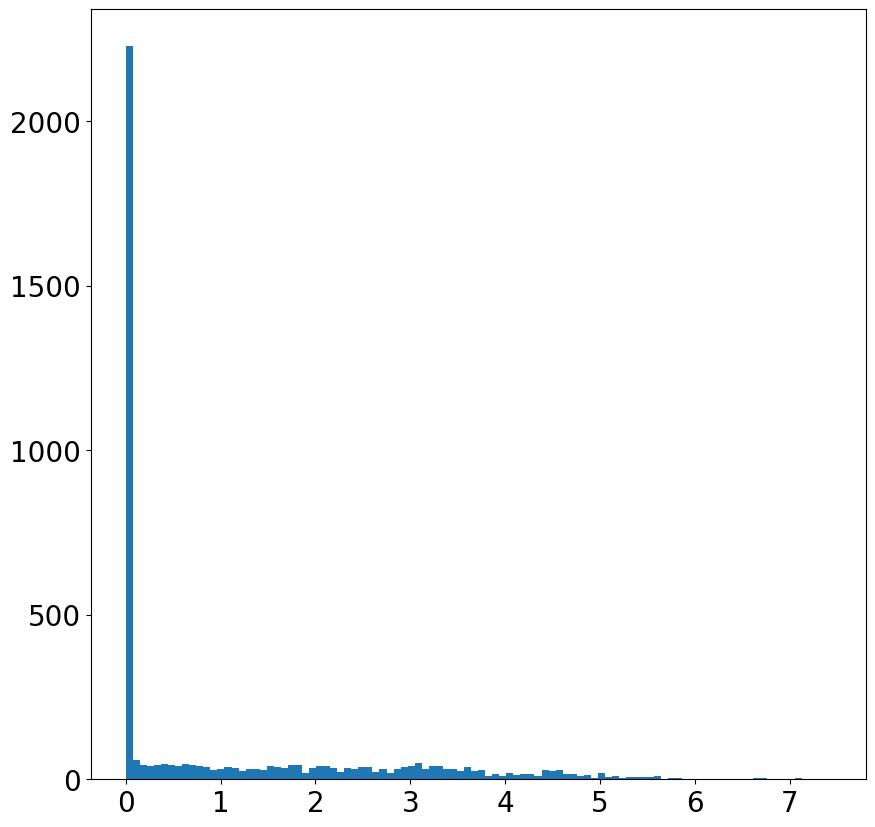

In [14]:

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

This plot shows that amost half of our structures are metals (zero bandgap). The bandgaps around 7 eV could be outliers, but we can deal with those in a later lecture. 

How about a scatter plot?

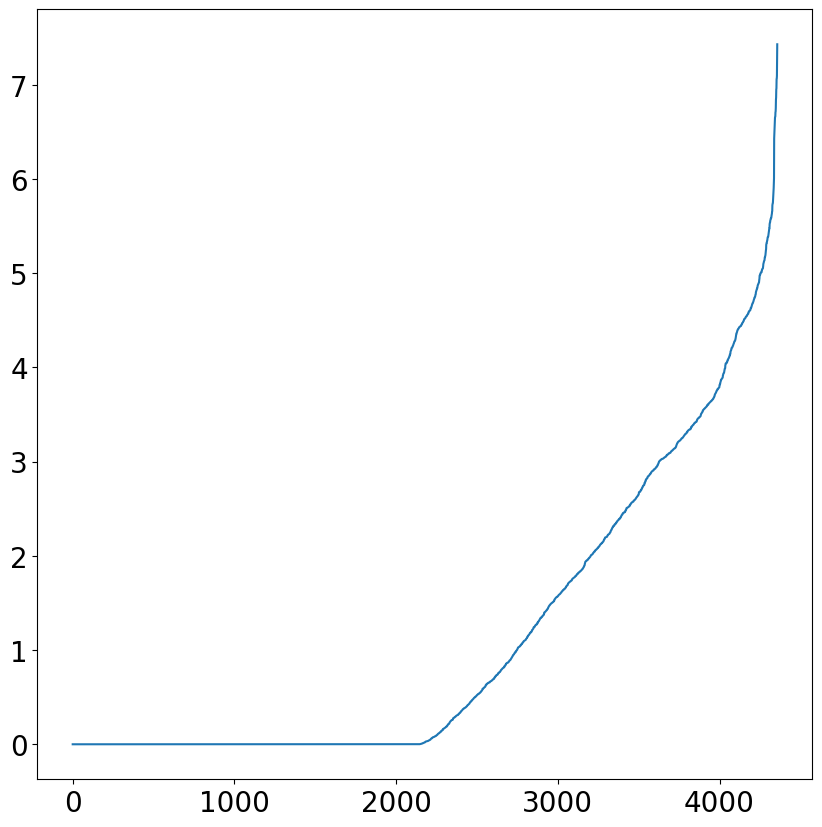

In [15]:
band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot', bbox_inches='tight')


Next, we split the dataset into training and test sets, and we use the 80/20 split ratio.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset_df, band_gaps, test_size=.2, random_state=None)

Then we normalize our dataset using the normalization applied on the training set.

In [17]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# We need to normalize the data using a scaler

# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Next, we create a pandas DataFrame object


## The machine learning task

Now it's time to actually do machine learning. We will try two machine learning models: the random forests and the XGBOOST models. We will quantify the prediction accuracy using two measures: goodness of fit (R2) and the mean squared error (MSE).

RF MAE	0.49817129697056567

RF R2	0.7275929862595332

XGBOOST MAE	0.47197538756557167

XGBOOST R2	0.7274562218993319



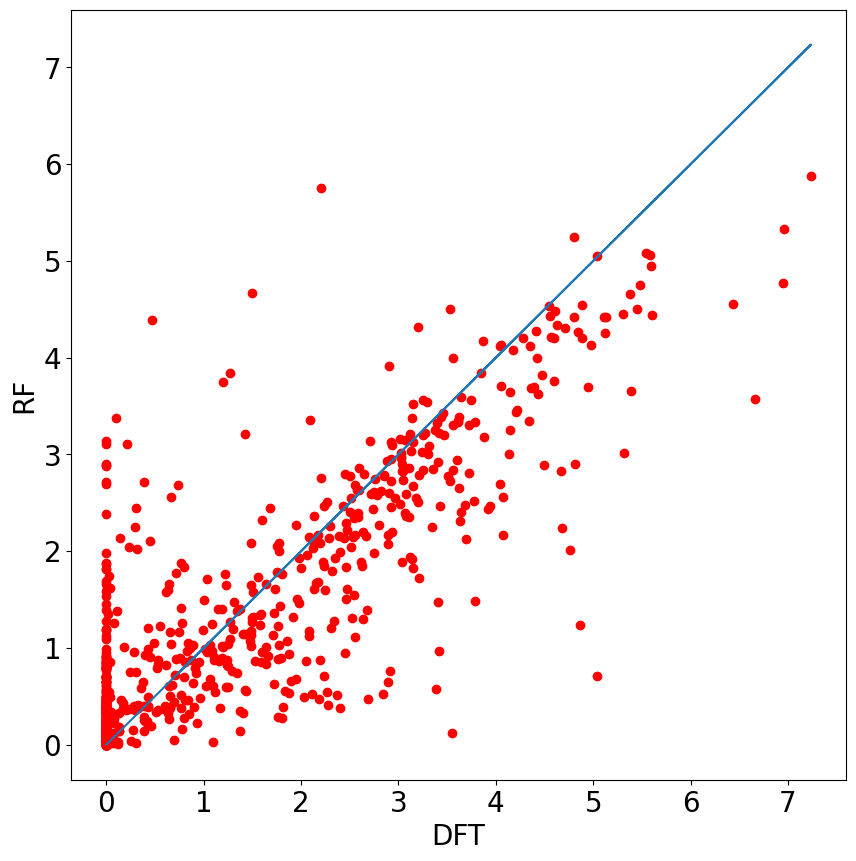

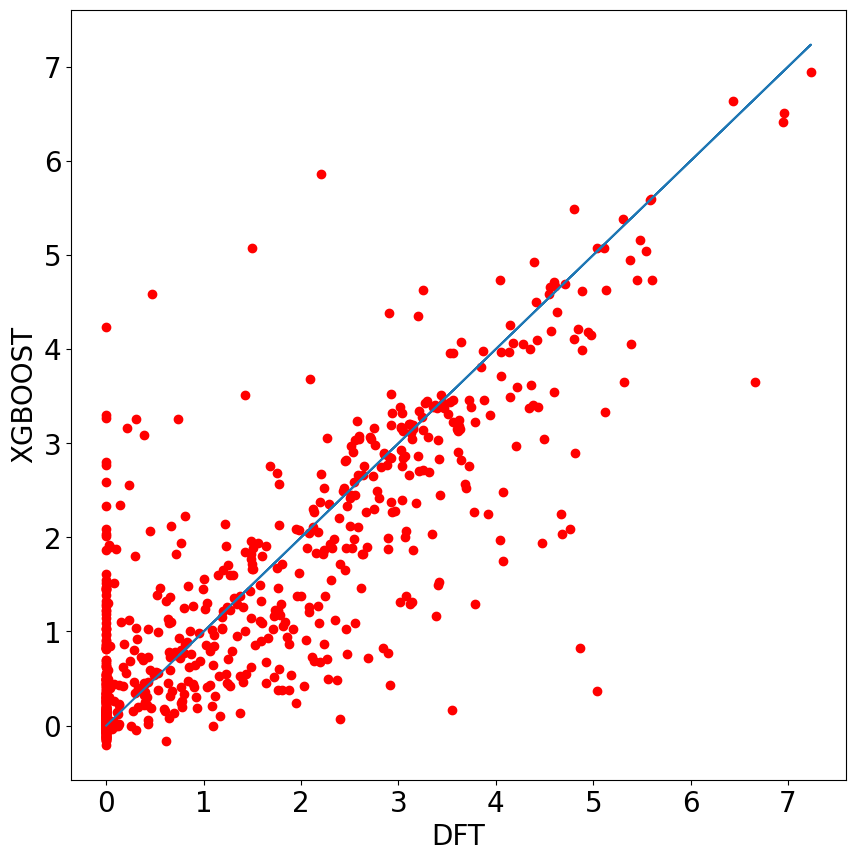

In [18]:


from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')



Achieving R$^2$ > 0.71  and MAE < 0.5 is certainly good, but more can be done. That is why we have developed the CrystalFeatures suit with many more features to improve the prediction accuracy of the bandgap, as well as other things.

That's it for now!